# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
#import sys
#!{sys.executable} -m pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        print(city)

# Print the city count to confirm sufficient count
len(cities)

rio cuarto
louisbourg
vardo
barrow
kapaa
saleaula
san patricio
bonthe
ushuaia
prince rupert
srednekolymsk
qaanaaq
georgetown
amderma
guerrero negro
tasiilaq
kathmandu
rikitea
luderitz
nizhneyansk
hasaki
cape town
dembi dolo
belushya guba
gusau
east london
omboue
la ronge
karaul
santa isabel do rio negro
hithadhoo
arraial do cabo
busselton
jamestown
saint-denis
ponta do sol
puerto ayora
natal
vaini
cayenne
omsukchan
lakes entrance
polunochnoye
hilo
lavrentiya
ajaccio
yellowknife
great yarmouth
domoni
fortuna
manga
lasa
mar del plata
tuy hoa
baiyin
kieta
kloulklubed
saint-philippe
lebu
batagay-alyta
ambon
ola
chokurdakh
kodiak
kisangani
turtkul
bacolod
taolanaro
albany
carthage
kayes
dikson
geraldton
sabzevar
broome
saskylakh
codajas
oussouye
bluff
hobart
ribeira grande
victoria
imuris
mamonovo
lichinga
los llanos de aridane
weligama
port elizabeth
sakaiminato
torbay
beloha
new norfolk
salamiyah
kungurtug
bathsheba
vostok
concarneau
teya
kisoro
bambous virieux
sarangani
maragogi
illoqqor

615

In [42]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = 'd1b4140a34cc849915b385a2ac4fac14'
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -34.84, 'lat': -6.97},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 26.5,
  'pressure': 1026.78,
  'humidity': 99,
  'temp_min': 26.5,
  'temp_max': 26.5,
  'sea_level': 1028.81,
  'grnd_level': 1026.78},
 'wind': {'speed': 2.86, 'deg': 141.501},
 'clouds': {'all': 24},
 'dt': 1544415266,
 'sys': {'message': 0.003,
  'country': 'BR',
  'sunrise': 1544428598,
  'sunset': 1544473675},
 'id': 3404558,
 'name': 'Cabedelo',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = 'c8194a677216dfb3c9add04f96324e10'

# Structuring DataFrame
df = pd.DataFrame(columns=['City','Cludiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

# Get weather data
i=1
j=1
print(f'Beginning Data Retrieval\n-----------------------------')
for city in cities:
    print(f'Processing Record {i} of Set {j} | {city}')
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(query_url)
        cloud = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        humid = weather_json['main']['humidity']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        wind = weather_json['wind']['speed']
        df = df.append(pd.Series([city,cloud,country,date,humid,lat,lng,max_temp,wind], index=list(df)), ignore_index=True)
        if i == 49:
            i=1
            j+=1
        else:
            i+=1
    except:
        print('City not found. Skipping...')
print(f'-----------------------------\nData Retrieval Complete\n----------------------------- ')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=rio cuarto&units=metric
Processing Record 2 of Set 1 | louisbourg
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=louisbourg&units=metric
City not found. Skipping...
Processing Record 2 of Set 1 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=vardo&units=metric
Processing Record 3 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=barrow&units=metric
Processing Record 4 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kapaa&units=metric
Processing Record 5 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=saleaula&units=metric
City not found. Skipping.

Processing Record 46 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=mar del plata&units=metric
Processing Record 47 of Set 1 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=tuy hoa&units=metric
Processing Record 48 of Set 1 | baiyin
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=baiyin&units=metric
Processing Record 49 of Set 1 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kieta&units=metric
Processing Record 1 of Set 2 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kloulklubed&units=metric
Processing Record 2 of Set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=saint-philippe&units=metric
Processing Record 3 of Set 2 | lebu
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=gualaceo&units=metric
Processing Record 48 of Set 2 | aflu
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=aflu&units=metric
City not found. Skipping...
Processing Record 48 of Set 2 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=eydhafushi&units=metric
Processing Record 49 of Set 2 | abnub
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=abnub&units=metric
Processing Record 1 of Set 3 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=shingu&units=metric
Processing Record 2 of Set 3 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kaitangata&units=metric
Processing Record 3 of Set 3 | vao
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e1

Processing Record 49 of Set 3 | bucerias
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=bucerias&units=metric
Processing Record 1 of Set 4 | suleja
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=suleja&units=metric
Processing Record 2 of Set 4 | fukue
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=fukue&units=metric
Processing Record 3 of Set 4 | pontianak
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=pontianak&units=metric
Processing Record 4 of Set 4 | harper
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=harper&units=metric
Processing Record 5 of Set 4 | hoyvik
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=hoyvik&units=metric
Processing Record 6 of Set 4 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=muros&units=metric
Processing Record 4 of Set 5 | aranos
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=aranos&units=metric
Processing Record 5 of Set 5 | nikki
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=nikki&units=metric
Processing Record 6 of Set 5 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=salalah&units=metric
Processing Record 7 of Set 5 | noshiro
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=noshiro&units=metric
Processing Record 8 of Set 5 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=north bend&units=metric
Processing Record 9 of Set 5 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=qasigiannguit&units=

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=union&units=metric
Processing Record 6 of Set 6 | lieksa
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=lieksa&units=metric
Processing Record 7 of Set 6 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=taltal&units=metric
Processing Record 8 of Set 6 | suarez
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=suarez&units=metric
Processing Record 9 of Set 6 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=narsaq&units=metric
Processing Record 10 of Set 6 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=provideniya&units=metric
Processing Record 11 of Set 6 | porbandar
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=porbandar&units=metric

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=tual&units=metric
Processing Record 9 of Set 7 | zwedru
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=zwedru&units=metric
Processing Record 10 of Set 7 | kolobrzeg
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kolobrzeg&units=metric
Processing Record 11 of Set 7 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=manggar&units=metric
Processing Record 12 of Set 7 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=pisco&units=metric
Processing Record 13 of Set 7 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kendari&units=metric
Processing Record 14 of Set 7 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=sitka&units=metric
Process

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=portoferraio&units=metric
Processing Record 9 of Set 8 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=samarai&units=metric
Processing Record 10 of Set 8 | tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=tsiroanomandidy&units=metric
Processing Record 11 of Set 8 | chester
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=chester&units=metric
Processing Record 12 of Set 8 | sobradinho
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=sobradinho&units=metric
Processing Record 13 of Set 8 | atagay
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=atagay&units=metric
Processing Record 14 of Set 8 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96

Processing Record 10 of Set 9 | muli
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=muli&units=metric
Processing Record 11 of Set 9 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=maceio&units=metric
Processing Record 12 of Set 9 | airai
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=airai&units=metric
Processing Record 13 of Set 9 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=ayan&units=metric
Processing Record 14 of Set 9 | la libertad
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=la libertad&units=metric
Processing Record 15 of Set 9 | plouzane
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=plouzane&units=metric
Processing Record 16 of Set 9 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=akniste&units=metric
Processing Record 8 of Set 10 | itanhandu
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=itanhandu&units=metric
Processing Record 9 of Set 10 | villarrobledo
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=villarrobledo&units=metric
Processing Record 10 of Set 10 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=tiarei&units=metric
Processing Record 11 of Set 10 | menongue
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=menongue&units=metric
Processing Record 12 of Set 10 | rawdon
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=rawdon&units=metric
Processing Record 13 of Set 10 | bambari
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=bluefield&units=metric
Processing Record 4 of Set 11 | hemsedal
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=hemsedal&units=metric
Processing Record 5 of Set 11 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=kavaratti&units=metric
Processing Record 6 of Set 11 | sakassou
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=sakassou&units=metric
Processing Record 7 of Set 11 | taksimo
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=taksimo&units=metric
Processing Record 8 of Set 11 | mezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=mezhevoy&units=metric
Processing Record 9 of Set 11 | pueblo nuevo
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=p

http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=genhe&units=metric
Processing Record 4 of Set 12 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=henties bay&units=metric
Processing Record 5 of Set 12 | pathein
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=pathein&units=metric
Processing Record 6 of Set 12 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=buraydah&units=metric
Processing Record 7 of Set 12 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=taoudenni&units=metric
Processing Record 8 of Set 12 | fruitville
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=fruitville&units=metric
Processing Record 9 of Set 12 | sur
http://api.openweathermap.org/data/2.5/weather?appid=c8194a677216dfb3c9add04f96324e10&q=sur&

In [56]:
df

,City,Cludiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rio cuarto,0,AR,1544414400,60,-33.13,-64.35,20,2.60
1,vardo,1,US,1544415900,92,39.62,-77.74,0,1.21
2,barrow,0,AR,1544417584,35,-38.31,-60.23,18.03,4.91
3,kapaa,90,US,1544414160,68,22.08,-159.32,23.9,11.30
4,san patricio,32,PY,1544417585,69,-26.98,-56.83,19.91,1.86
5,bonthe,0,SL,1544417585,96,7.53,-12.50,25.31,1.51
6,ushuaia,40,AR,1544414400,46,-54.81,-68.31,12,4.21
7,prince rupert,90,CA,1544417340,93,54.32,-130.32,7,5.70
8,srednekolymsk,68,RU,1544417585,44,67.46,153.71,-33.25,1.36
9,qaanaaq,68,GL,1544417585,99,77.48,-69.36,-18.35,11.31


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
df.to_csv("weather.csv",encoding="utf-8", index=False, header=True)
df.count()

City          561
Cludiness     561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [60]:
df.head()

,City,Cludiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rio cuarto,0,AR,1544414400,60,-33.13,-64.35,20,2.60
1,vardo,1,US,1544415900,92,39.62,-77.74,0,1.21
2,barrow,0,AR,1544417584,35,-38.31,-60.23,18.03,4.91
3,kapaa,90,US,1544414160,68,22.08,-159.32,23.9,11.30
4,san patricio,32,PY,1544417585,69,-26.98,-56.83,19.91,1.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

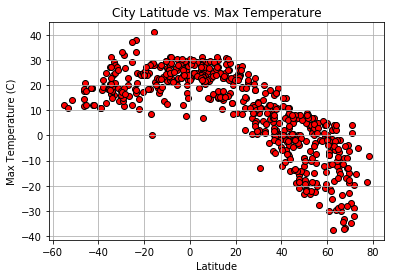

In [66]:
plt.scatter(df['Lat'], df['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.savefig("Max Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

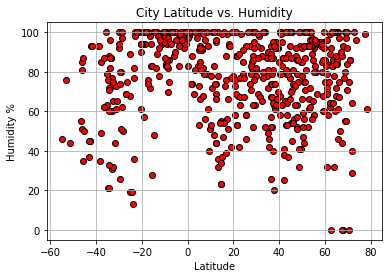

In [67]:
plt.scatter(df['Lat'], df['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

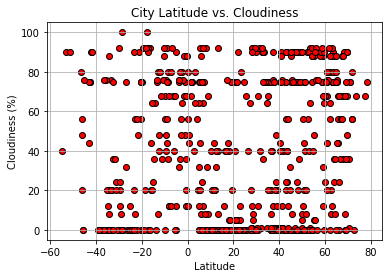

In [68]:
plt.scatter(df['Lat'], df['Cludiness'], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

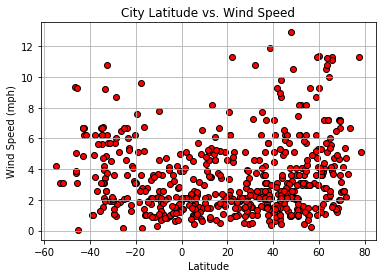

In [69]:
plt.scatter(df['Lat'], df['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Wind Speed.png")
plt.show()